In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the california housing dataset

In [3]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [4]:
type(california)

sklearn.utils._bunch.Bunch

In [5]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
#Lets check the desc of the dataset
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [8]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [9]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# Preparing Dataset

In [10]:
dataset=pd.DataFrame(california.data, columns=california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
dataset['Price']=california.target

In [12]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
dataset.shape

(20640, 9)

In [15]:
#Summarizing the stats of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
#check the missing value
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [17]:
#Exploratory Data Analysis
#correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [18]:
# sns.pairplot(dataset )

Text(0, 0.5, 'price')

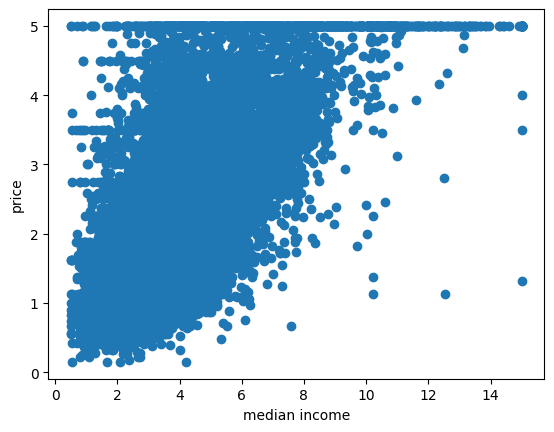

In [19]:
plt.scatter(dataset['MedInc'], dataset['Price'])
plt.xlabel('median income')
plt.ylabel('price')

Text(0, 0.5, 'price')

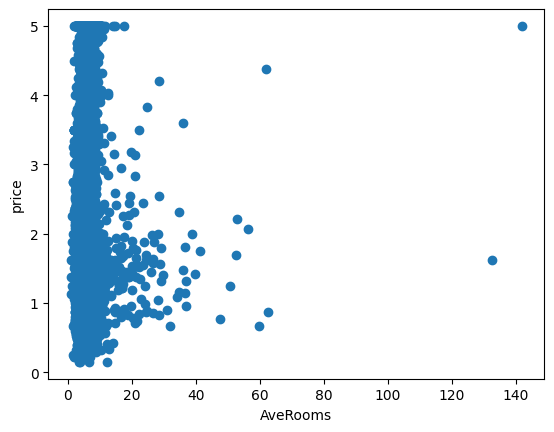

In [20]:
plt.scatter(dataset['AveRooms'], dataset['Price'])
plt.xlabel('AveRooms')
plt.ylabel('price')

<Axes: xlabel='AveRooms', ylabel='Price'>

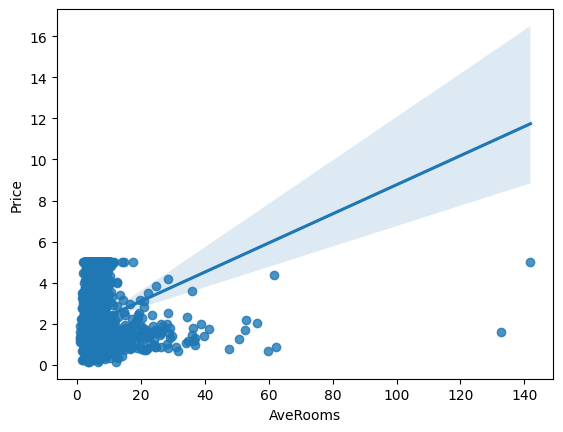

In [21]:
sns.regplot(x='AveRooms', y='Price', data=dataset)
#which appears to be a positively correlated

<Axes: xlabel='Latitude', ylabel='Price'>

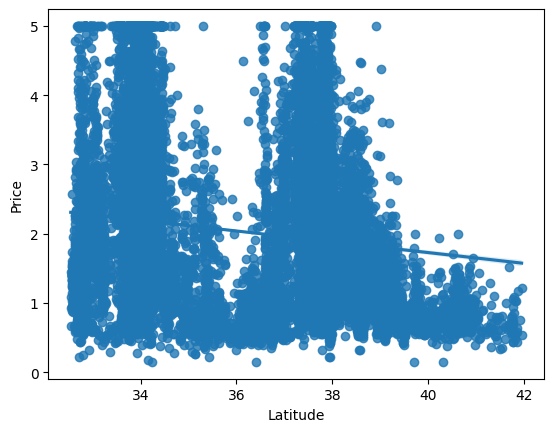

In [22]:
sns.regplot(x='Latitude', y='Price', data=dataset)
#which appears to be a negatively correlated

<Axes: xlabel='AveOccup', ylabel='Price'>

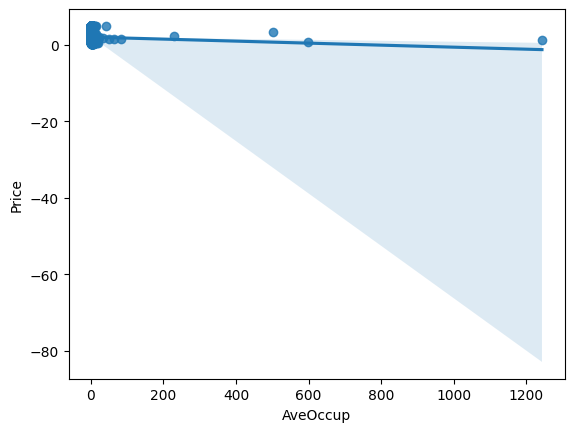

In [23]:
sns.regplot(x='AveOccup', y='Price', data=dataset)
#which appears to be a barely correlated

<Axes: xlabel='MedInc', ylabel='Price'>

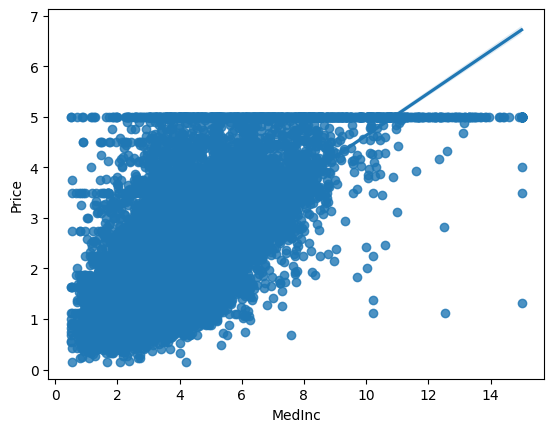

In [24]:
sns.regplot(x='MedInc', y='Price', data=dataset)
#which appears to be a positively correlated

In [25]:
#Independant and Dependant Variables
X=dataset.iloc[:, :-1]
y=dataset.iloc[:, -1]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81
...,...,...,...,...,...,...,...,...
13123,4.4125,20.0,6.000000,1.045662,712.0,3.251142,38.27,-121.26
19648,2.9135,27.0,5.349282,0.933014,647.0,3.095694,37.48,-120.89
9845,3.1977,31.0,3.641221,0.941476,704.0,1.791349,36.58,-121.90
10799,5.6315,34.0,4.540598,1.064103,1052.0,2.247863,33.62,-117.93


In [28]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
19681,3.0962,36.0,4.746421,0.930470,1168.0,2.388548,39.15,-121.62
12156,4.1386,2.0,8.821216,1.414779,2826.0,3.368296,33.66,-117.17
10211,7.8750,30.0,7.550926,0.981481,523.0,2.421296,33.89,-117.91
2445,2.0658,34.0,5.938144,1.206186,363.0,3.742268,36.56,-119.64


In [29]:
#Standardizing the dataset
#in linear regression we need to reach to global minima and
#since every col has their own unit,
#we need to bring them on same scale using scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
scaler.fit_transform(X_train)

array([[-1.00030408,  1.8562098 , -1.146823  , ...,  0.25982829,
         0.51396387, -0.11131397],
       [-0.84938602,  1.14171192, -0.76585476, ..., -0.00327132,
         0.99993462, -1.3173838 ],
       [ 1.28620508, -0.92239307,  0.46102722, ...,  0.11210392,
        -0.82245571,  0.76084397],
       ...,
       [-0.35374656,  0.18904808, -0.77908241, ..., -0.1818844 ,
         0.44387193, -1.16288725],
       [ 0.93323448,  0.42721404, -0.38591908, ..., -0.1154139 ,
        -0.9392756 ,  0.81566532],
       [-1.31060093, -1.08117038, -0.65304797, ...,  0.05761909,
        -1.32244485,  1.99681635]])

In [31]:
scaler.transform(X_test)

array([[ 0.15077666, -0.5254498 ,  0.10477153, ...,  0.16599986,
        -1.42524636,  1.25423617],
       [ 1.01154901,  0.26843673,  0.29893351, ..., -0.00284492,
        -0.79909173,  0.79573028],
       [ 0.25489638,  0.03027077,  0.22177006, ..., -0.01898759,
         1.41114065, -1.13298469],
       ...,
       [ 2.11958585,  0.10965942,  0.93004803, ..., -0.09016131,
        -0.81311012,  0.82563284],
       [-0.95228951,  0.42721404,  0.22501928, ...,  0.10217786,
         0.43452634, -0.03655757],
       [ 0.42802383,  0.26843673, -0.04732252, ..., -0.038109  ,
         0.80835   , -1.20774109]])

In [36]:
import pickle
pickle.dump(scaler,open('scaler.pkl', 'wb'))

# Model Training

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error

In [32]:
regressor=LinearRegression()

In [33]:
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
#print coefficient and the intercept
print(regressor.coef_)
print(regressor.intercept_)

[ 4.46773975e-01  9.18409990e-03 -1.18116775e-01  6.42290879e-01
 -9.37026507e-06 -4.08535934e-03 -4.09023312e-01 -4.23419564e-01]
-36.01222888765239


In [35]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# Assumptions

In [36]:
reg_pred=regressor.predict(X_test)

In [37]:
reg_pred

array([2.2702672 , 2.79059912, 1.90984782, ..., 3.56895295, 0.98163812,
       2.72552317])

In [38]:
# y test are the actual values
# reg_pred are the predicted values

<Axes: xlabel='Price'>

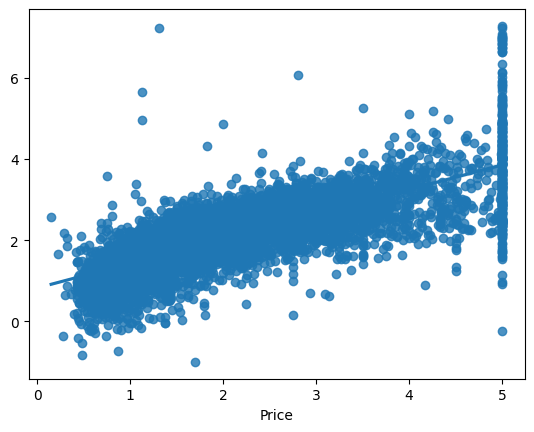

In [39]:
sns.regplot(x=y_test, y=reg_pred)

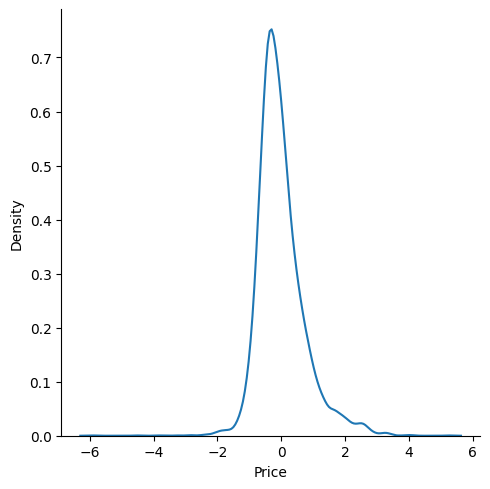

In [40]:
residuals=y_test-reg_pred
sns.displot(residuals, kind='kde')

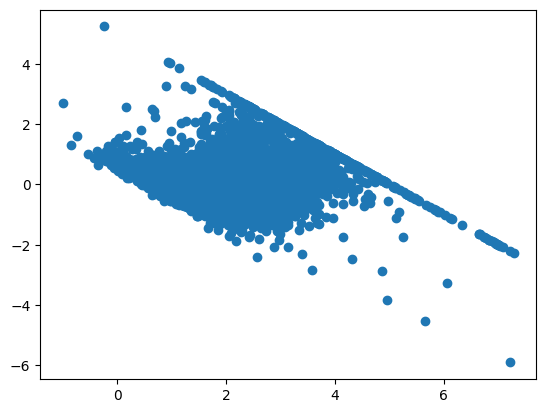

In [41]:
plt.scatter(reg_pred, residuals)

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

0.5361818140641839
0.5431489670037241
0.7369864089681193


In [43]:
from sklearn.metrics import r2_score
score=r2_score(y_test, reg_pred)
print(score)

0.5926087785518774


Adjusted  r2_squared

In [44]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5920816671542413

# New data prediction

In [45]:
california.data[0].reshape(1,-1).shape

(1, 8)

In [46]:
california.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [47]:
#transformation of new data
scaler.transform(california.data[0].reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.35764931,  0.98293461,  0.68227143, -0.15674759, -0.95965079,
        -0.07061258,  1.05133538, -1.32735132]])

In [48]:
regressor.predict(scaler.transform(california.data[0].reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-34.9988271])

# Pickling the model file for deployment

In [49]:
import pickle

It's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.

Use pickle:
When you need to save data or program objects for later use.
When you want to pass data between different programs or share data.

In [50]:
pickle.dump(regressor, open('regmodel.pkl', 'wb'))

In [51]:
pickled_model=pickle.load(open('regmodel.pkl', 'rb'))

In [52]:
pickled_model.predict(scaler.transform(california.data[0].reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-34.9988271])